In [1]:
import yfinance as yf
import pymc as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define stock symbol and date range
symbol = 'GOOG'
start_date = '2015-01-01'
end_date = '2022-02-20'

# Download stock data from Yahoo Finance
stock_data = yf.download(symbol, start=start_date, end=end_date)

# Compute daily returns
returns = stock_data['Adj Close'].pct_change()[1:]

# Define PyMC model
model = pm.Model()

# Define prior distributions for model parameters
mu = pm.Normal('mu', mu=0, tau=1/(0.2)**2, value=0)
sigma = pm.Uniform('sigma', lower=0, upper=0.5, value=0.1)

# Define likelihood function
returns_obs = pm.Normal('returns_obs', mu=mu, tau=1/(sigma)**2, value=returns, observed=True)

# Run MCMC sampler
mcmc = pm.MCMC(model)
mcmc.sample(iter=2000, burn=500, thin=2)

# Generate predictions
num_predictions = 30
prev_return = returns[-1]

# Extract posterior samples
mu_samples = mcmc.trace('mu')[:]
sigma_samples = mcmc.trace('sigma')[:]

# Define distribution for future returns
future_return = pm.Normal('future_return', mu=mu, tau=1/(sigma)**2)

# Generate predictions
predictions = []
for i in range(num_predictions):
    future_return_sample = future_return.random()
    pred_price = stock_data['Adj Close'][-1] * (1 + future_return_sample)
    predictions.append(pred_price)
    prev_return = future_return_sample

# Plot predicted prices
dates = pd.date_range(start=stock_data.index[-1], periods=num_predictions+1, freq='D')[1:]
plt.plot(stock_data.index, stock_data['Adj Close'])
plt.plot(dates, predictions)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend([symbol, 'Predicted'])
plt.show()


[*********************100%***********************]  1 of 1 completed


TypeError: No model on context stack, which is needed to instantiate distributions. Add variable inside a 'with model:' block, or use the '.dist' syntax for a standalone distribution.

In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm
import yfinance as yf

# Load the historical Google stock price data
goog = yf.Ticker("GOOGL")
data = goog.history(period="max")

# Extract the closing price data
closing_price = data["Close"]

# Define the model
with pm.Model() as model:
    # Define the prior for the next day's price
    mu = pm.Normal("mu", mu=closing_price.mean(), sigma=closing_price.std())
    
    # Define the likelihood for the next day's price
    obs = pm.Normal("obs", mu=mu, sigma=closing_price.std(), observed=closing_price)
    
    # Sample from the posterior distribution using MCMC
    trace = pm.sample(draws=10000, tune=1000)
    
# Extract the predicted next day's price from the posterior distribution
predicted_price = trace["mu"][-1]

# Simulate the next month's prices using the predicted price and the historical price volatility
predicted_prices = [predicted_price]
for i in range(30):
    predicted_price = np.random.normal(predicted_price, closing_price.std())
    predicted_prices.append(predicted_price)

# Print the predicted prices for the next month
print("Predicted prices for the next month:")
print(predicted_prices)


WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
c:\ProgramData\Anaconda3\envs\py39_pymc32\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 22 seconds.


Predicted prices for the next month:
[38.40211676503892, 36.31153963504119, 52.90789089406462, 51.579398150338974, -19.400841744260802, 0.13889489680769174, -28.587966273196123, -17.142840221177543, 29.444947996696776, -23.427748359670908, -60.72115743506886, -47.12253996548317, -107.50147372360574, -83.55255487511975, -75.88025214602919, -82.46511255031893, -77.68307516166628, -33.11327316356454, 0.12981795081939396, 2.4581058432731404, -22.59190612192951, 2.681467799074838, 72.44653772349226, 137.50836571733203, 168.95473970268458, 203.95878245515624, 249.8866977860863, 228.96169964794765, 232.44345671512923, 278.5077668224483, 193.22016040292124]


c:\ProgramData\Anaconda3\envs\py39_pymc32\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Sampling 4 chains for 5_000 tune and 50_000 draw iterations (20_000 + 200_000 draws total) took 55 seconds.


Predicted prices for the next 3 months:
[38.566600350195046, 9.78467392781571, 23.358293325068384, -62.679634066555636, -30.76241030065097, 0.9584347880398418, 40.34694904350556, -30.875245023933246, -28.055666633608393, -58.213699686592406, -14.333100670804946, -17.528590548242857, 8.286015987009268, -4.897555322692325, 8.199788625953872, 101.84336474877189, 95.23789794232673, 148.8645798121581, 123.63255490512968, 132.24788952050926, 102.6337712702468, 121.71004671596243, 87.21775582671444, 75.54905599285354, 49.11811330217448, 63.330058953275284, 54.5031674528457, -2.9421168330743654, -5.802505712565464, 6.224819556485384, -22.409785398610644, 32.99391785792078, -4.625718293131655, 27.30924506159473, -47.03236664816807, -56.39369451317046, -33.367164838637116, -10.849613337077933, 8.756127229705527, 4.602636012900066, 6.351522692083918, -51.32924495249341, -38.969513048801865, -22.42983344007082, -46.28134710595977, -47.355559794984224, -79.44410308885526, -143.62066011717758, -184.

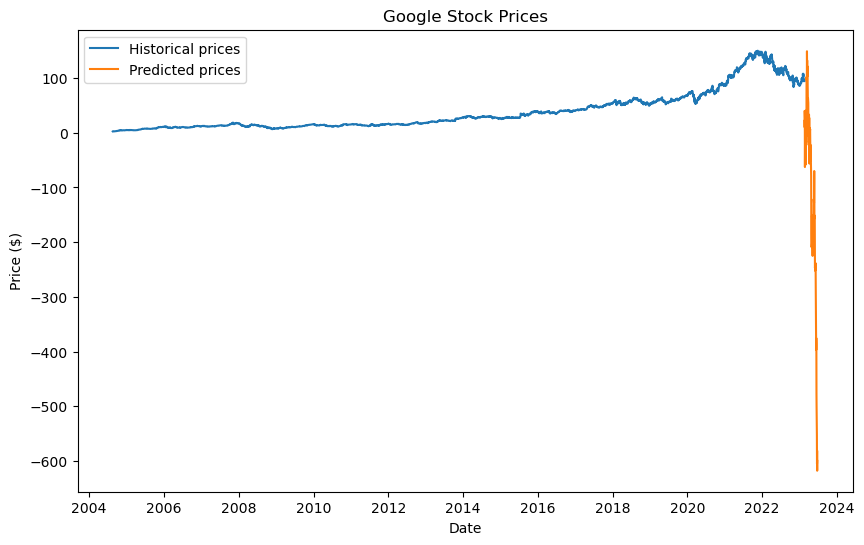

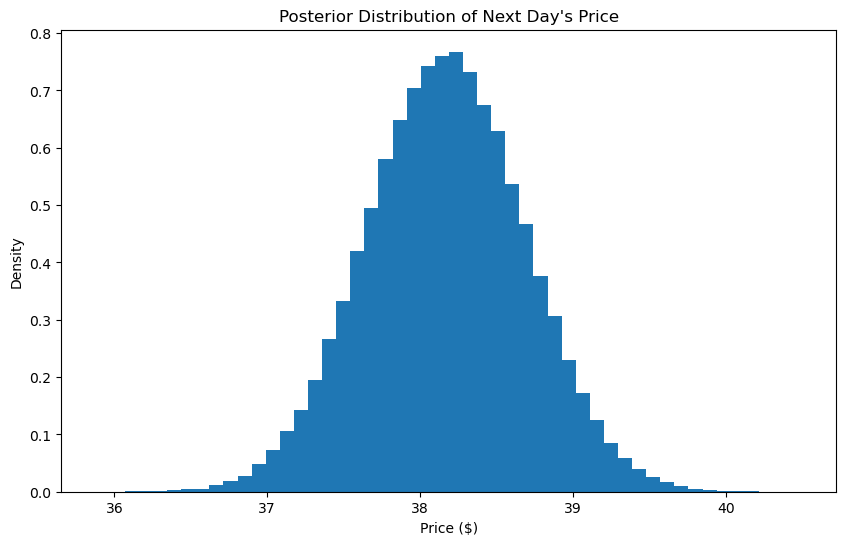

In [3]:
import numpy as np
import pandas as pd
import pymc3 as pm
import yfinance as yf
import matplotlib.pyplot as plt

# Load the historical Google stock price data
goog = yf.Ticker("GOOGL")
data = goog.history(period="max")

# Extract the closing price data
closing_price = data["Close"]

# Define the model
with pm.Model() as model:
    # Define the prior for the next day's price
    mu = pm.Normal("mu", mu=closing_price.mean(), sigma=closing_price.std())
    
    # Define the likelihood for the next day's price
    obs = pm.Normal("obs", mu=mu, sigma=closing_price.std(), observed=closing_price)
    
    # Sample from the posterior distribution using MCMC
    trace = pm.sample(draws=50000, tune=5000)
    
# Extract the predicted next day's price from the posterior distribution
predicted_price = trace["mu"][-1]

# Simulate the next month's prices using the predicted price and the historical price volatility
predicted_prices = [predicted_price]
for i in range(90):
    predicted_price = np.random.normal(predicted_price, closing_price.std())
    predicted_prices.append(predicted_price)

# Print the predicted prices for the next 3 months
print("Predicted prices for the next 3 months:")
print(predicted_prices)

# Plot the historical and predicted prices
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data.index, closing_price, label="Historical prices")
ax.plot(pd.date_range(start=data.index[-1], periods=len(predicted_prices), freq="B"), predicted_prices, label="Predicted prices")
ax.set_title("Google Stock Prices")
ax.set_xlabel("Date")
ax.set_ylabel("Price ($)")
ax.legend()
plt.show()

# Plot the posterior distribution of the next day's price
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(trace["mu"], bins=50, density=True)
ax.set_title("Posterior Distribution of Next Day's Price")
ax.set_xlabel("Price ($)")
ax.set_ylabel("Density")
plt.show()


c:\ProgramData\Anaconda3\envs\py39_pymc32\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 40 seconds.
c:\ProgramData\Anaconda3\envs\py39_pymc32\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 33 seconds.


  -> valid_predicted_prices:  91 
  -> valid_closing_price:  90


c:\ProgramData\Anaconda3\envs\py39_pymc32\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Sampling 4 chains for 5_000 tune and 20_000 draw iterations (20_000 + 80_000 draws total) took 48 seconds.
The acceptance probability does not match the target. It is 0.8856496470434786, but should be close to 0.8. Try to increase the number of tuning steps.
c:\ProgramData\Anaconda3\envs\py39_pymc32\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Sampling 4 chains for 5_000 tune and 20_000 draw iterations (20_000 + 80_000 draws total) took 55 seconds.


  -> valid_predicted_prices:  91 
  -> valid_closing_price:  90


c:\ProgramData\Anaconda3\envs\py39_pymc32\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Sampling 4 chains for 5_000 tune and 30_000 draw iterations (20_000 + 120_000 draws total) took 70 seconds.
The acceptance probability does not match the target. It is 0.6815392613691756, but should be close to 0.8. Try to increase the number of tuning steps.
c:\ProgramData\Anaconda3\envs\py39_pymc32\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Sampling 4 chains for 5_000 tune and 30_000 draw iterations (20_000 + 120_000 draws total) took 65 seconds.
c:\ProgramData\Anaconda3\envs\py39_pymc32\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...


  -> valid_predicted_prices:  91 
  -> valid_closing_price:  90


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Sampling 4 chains for 5_000 tune and 40_000 draw iterations (20_000 + 160_000 draws total) took 82 seconds.
The acceptance probability does not match the target. It is 0.6963830433096556, but should be close to 0.8. Try to increase the number of tuning steps.
c:\ProgramData\Anaconda3\envs\py39_pymc32\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Sampling 4 chains for 5_000 tune and 40_000 draw iterations (20_000 + 160_000 draws total) took 55 seconds.
c:\ProgramData\Anaconda3\envs\py39_pymc32\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  -> valid_predicted_prices:  91 
  -> valid_closing_price:  90


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Sampling 4 chains for 5_000 tune and 50_000 draw iterations (20_000 + 200_000 draws total) took 78 seconds.
c:\ProgramData\Anaconda3\envs\py39_pymc32\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Sampling 4 chains for 5_000 tune and 50_000 draw iterations (20_000 + 200_000 draws total) took 65 seconds.


  -> valid_predicted_prices:  91 
  -> valid_closing_price:  90
MSE values: [4126.988183769917, 2465.330186783481, 1377.5846715262628, 11381.988188217507, 1062.960983881943]


<bound method _AxesBase.set_xticks of <Axes: title={'center': 'Hyperparameter Optimization Results'}, xlabel='Hyperparameter Index', ylabel='MSE'>>

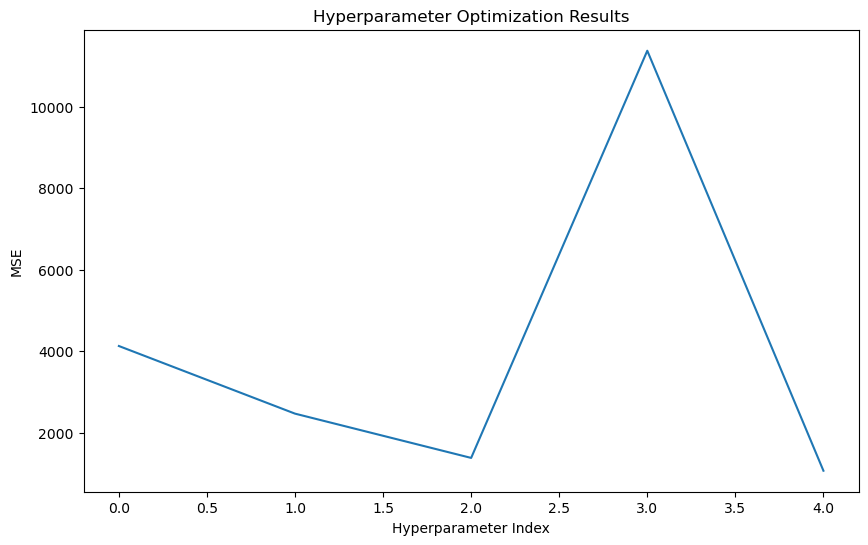

In [13]:
import numpy as np
import pandas as pd
import pymc3 as pm
import yfinance as yf
import matplotlib.pyplot as plt

# Load the historical Google stock price data
goog = yf.Ticker("GOOGL")
data = goog.history(period="max")

# Define the validation set size
valid_size = 90

# Loop over a range of hyperparameters
hyperparameters = [
    {"tune": 1000, "draws": 10000, "std": 0.001},
    {"tune": 2000, "draws": 20000, "std": 0.002},
    {"tune": 3000, "draws": 30000, "std": 0.003},
    {"tune": 4000, "draws": 40000, "std": 0.004},
    {"tune": 5000, "draws": 50000, "std": 0.005} # Best
]

hyperparameters = [
    {"tune": 5000, "draws": 10000, "std": 0.001},
    {"tune": 5000, "draws": 20000, "std": 0.002},
    {"tune": 5000, "draws": 30000, "std": 0.003},
    {"tune": 5000, "draws": 40000, "std": 0.004},
    {"tune": 5000, "draws": 50000, "std": 0.005} # Best
]

""" # Didn't seem to get better, 'best' did match to above
hyperparameters = [
    {"tune": 5000, "draws": 10000, "std": 0.005},
    {"tune": 5000, "draws": 20000, "std": 0.005},
    {"tune": 5000, "draws": 30000, "std": 0.005},
    {"tune": 5000, "draws": 40000, "std": 0.005},
    {"tune": 5000, "draws": 50000, "std": 0.005} 
]"""" 

mse_values = []

for params in hyperparameters:
    # Define the training and validation sets
    train_data = data.iloc[:-valid_size]
    valid_data = data.iloc[-valid_size:]

    # Extract the closing price data
    train_closing_price = train_data["Close"]
    valid_closing_price = valid_data["Close"]

    # Define the model
    with pm.Model() as model:
        # Define the prior for the next day's price
        mu = pm.Normal("mu", mu=train_closing_price.mean(), sigma=train_closing_price.std())

        # Define the likelihood for the next day's price
        obs = pm.Normal("obs", mu=mu, sigma=train_closing_price.std(), observed=train_closing_price)

        # Sample from the posterior distribution using MCMC
        trace = pm.sample(draws=params["draws"], tune=params["tune"])

    # Extract the predicted next day's price from the posterior distribution
    predicted_price = trace["mu"][-1]

    # Simulate the next month's prices using the predicted price and the historical price volatility
    predicted_prices = [predicted_price]
    for i in range(valid_size):
        predicted_price = np.random.normal(predicted_price, train_closing_price.std())
        predicted_prices.append(predicted_price)

    # Evaluate the model on the validation set
    with model:
        # Define the likelihood for the validation set
        valid_obs = pm.Normal("valid_obs", mu=mu, sigma=valid_closing_price.std(), observed=valid_closing_price)

        # Generate posterior samples
        valid_trace = pm.sample(draws=params["draws"], tune=params["tune"])

    # Compute the mean squared error (MSE) between the predicted and actual closing prices in the validation set
    valid_predicted_prices = [valid_trace["mu"][-1]]
    for i in range(valid_size):
        valid_predicted_price = np.random.normal(valid_predicted_prices[-1], valid_closing_price.std())
        valid_predicted_prices.append(valid_predicted_price)
    print("  -> valid_predicted_prices: " , str(len(valid_predicted_prices)) , "\n  -> valid_closing_price: " , str(len(valid_closing_price)))
    valid_mse = ((valid_predicted_prices[1:] - valid_closing_price)**2).mean()

    # Append the MSE to the list of MSE values
    mse_values.append(valid_mse)

# Print the MSE values
print("MSE values:", mse_values)

# Plot the MSE values
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(len(hyperparameters)), mse_values)
ax.set_title("Hyperparameter Optimization Results")
ax.set_xlabel("Hyperparameter Index")
ax.set_ylabel("MSE")
ax.set_xticks


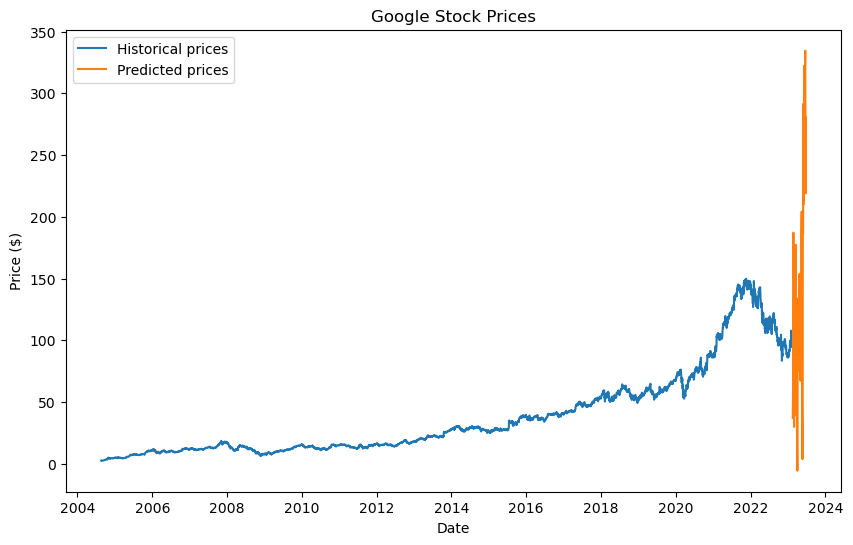

In [14]:
# Plot the historical and predicted prices
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data.index, closing_price, label="Historical prices")
ax.plot(pd.date_range(start=data.index[-1], periods=len(predicted_prices), freq="B"), predicted_prices, label="Predicted prices")
ax.set_title("Google Stock Prices")
ax.set_xlabel("Date")
ax.set_ylabel("Price ($)")
ax.legend()
plt.show()